# Aproximación trigonométrica

## Dependencias

In [1]:
from IPython.display import Latex
from sympy import *;
from sympy.interactive import printing;
from sympy.plotting import plot;
from sympy.abc import x, z;
from ipywidgets import interactive, interact_manual;

printing.init_printing(use_latex=True);

## Parámetros

In [3]:
#Período
T = 2*pi
n = Symbol('n')

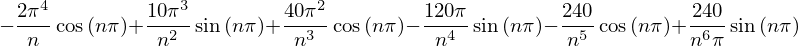

In [35]:
F = fourier_series(x**5, (x, -pi, pi));

#Extraemos an
an = 0 if F.an.formula == 0 else simplify((1/pi)*(F.an.formula.args[1].args[1].args[0]))
display(an)


#Extraemos bn
bn = 0 if F.bn.formula == 0 else simplify((1/pi)*(F.bn.formula.args[1].args[1].args[0]))  
display(bn)

def f(N):
    p1 = simplify(F.truncate(n=N))
    p = plot(x**5, p1, (x, -pi, pi), show = False)
    p[0].line_color='r';
    p.show()
    display(Latex('$T_{'+ str(N) +'} (x) = '+latex(p1)+'$'))
    

    
interactive_plot = interact_manual(f, N=(1, 20, 1) )
interactive_plot;



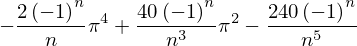

In [36]:
expr1 = sin(n*x)
expr2 = cos(n*x)

def pre(expr):
    print(expr)
    if(matches_sin(expr)):
        print('We got one sine exp')
        expr = Integer(0)
    if(matches_cos(expr)):
        print('We got one cosine exp')
        expr = Pow(Integer(-1), Symbol('n'))
    for arg in expr.args:
        pre(arg)   

def matches_sin(y):
    if(y.func == sin):
        if(y.args[0].func == Mul):
            if(len(y.args[0].args) == 2 and (y.args[0].args[0] == pi or y.args[0].args[1] == pi )):
                return True
    else:
        return False
               
def matches_cos(y):
    if(y.func == cos):
        if(y.args[0].func == Mul):
            if(len(y.args[0].args) == 2 and (y.args[0].args[0] == pi or y.args[0].args[1] == pi )):
                return True
    else:        
        return False        
                

expr = simplify((1/pi)*(F.bn.formula.args[1].args[1].args[0]))

t = (0, ) #Este se lo vamos a pasar a un objeto Add
for i in range(0, len(expr.args)): #Para cada uno de los objetos Mul en Add
    mul = (1, ) #Aquí vamos a construir cada mul
    for j in range(0, len(expr.args[i].args)):
        if matches_sin(expr.args[i].args[j]):
            mul = mul + (Integer(0), )
        if matches_cos(expr.args[i].args[j]):
            mul = mul + (Pow(Integer(-1), Symbol('n')), )
        else:
            mul = mul + (expr.args[i].args[j], )
    t = t + (Mul(*mul), )        
display(Add(*t))
  